<a href="https://colab.research.google.com/github/Preeyam1/project1/blob/master/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
import requests
from io import BytesIO
from zipfile import ZipFile

# URL of the dataset
url = 'https://archive.ics.uci.edu/static/public/848/secondary+mushroom+dataset.zip'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the content of the response
    zip_data = BytesIO(response.content)

    # Create a ZipFile object
    with ZipFile(zip_data, 'r') as zip_ref:
        # Extract all contents to the desired directory (e.g., '/content')
        zip_ref.extractall('/content')

    print("Dataset successfully downloaded and extracted.")
else:
    print(f"Failed to fetch the dataset. Status code: {response.status_code}")



Dataset successfully downloaded and extracted.


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/MushroomDataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
data=pd.read_csv('/content/MushroomDataset/secondary_data.csv',sep=';')
data.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [5]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [7]:
data.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [8]:
data.isnull().sum()/len(data)*100

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

In [9]:
data=data.drop(['gill-spacing','stem-root','stem-surface','veil-type','veil-color','spore-print-color'],axis=1)
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


In [10]:
data.shape

(61069, 15)

In [11]:
data['cap-surface'].value_counts()

t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: cap-surface, dtype: int64

In [12]:
data['cap-surface'].fillna(data['cap-surface'].mode()[0], inplace=True)

In [13]:
data['gill-attachment'].value_counts()

a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: gill-attachment, dtype: int64

In [14]:
data['gill-attachment'].fillna(data['gill-attachment'].mode()[0], inplace=True)

In [15]:
data['ring-type'].unique()

array(['g', 'p', 'e', 'l', 'f', 'm', nan, 'r', 'z'], dtype=object)

In [16]:
data['ring-type'].value_counts()

f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

In [17]:
data['ring-type'].fillna(data['ring-type'].mode()[0], inplace=True)

<Axes: xlabel='class', ylabel='count'>

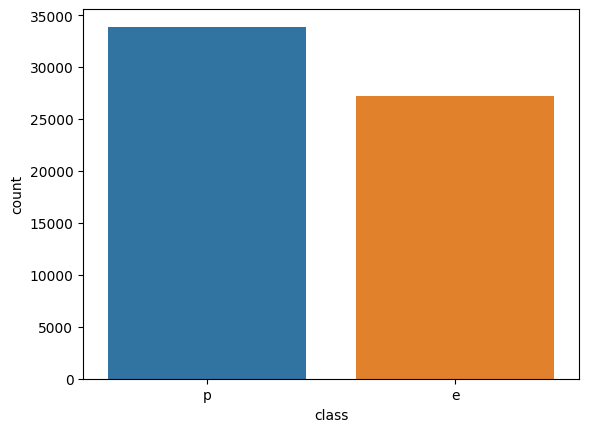

In [18]:
sns.countplot(x=data['class'],data=data)

<Axes: xlabel='cap-diameter', ylabel='Density'>

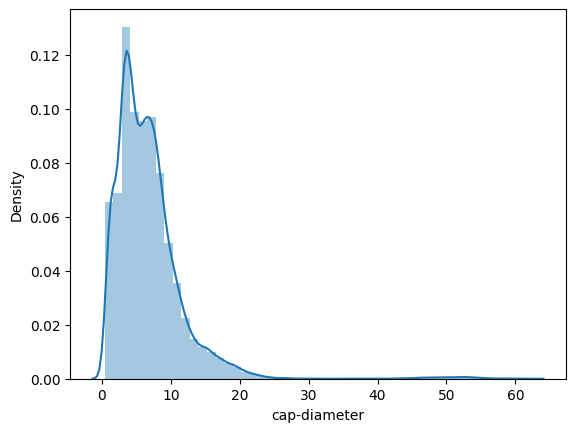

In [19]:
sns.distplot(data['cap-diameter'])

<Axes: xlabel='stem-height', ylabel='Density'>

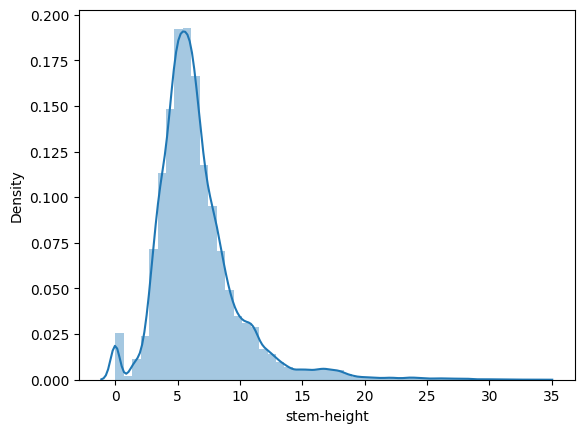

In [20]:
sns.distplot(data['stem-height'])

<Axes: xlabel='stem-width', ylabel='Density'>

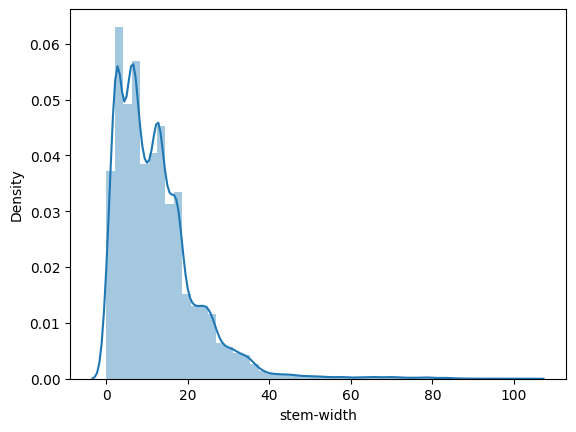

In [21]:
sns.distplot(data['stem-width'])

<Axes: ylabel='cap-diameter'>

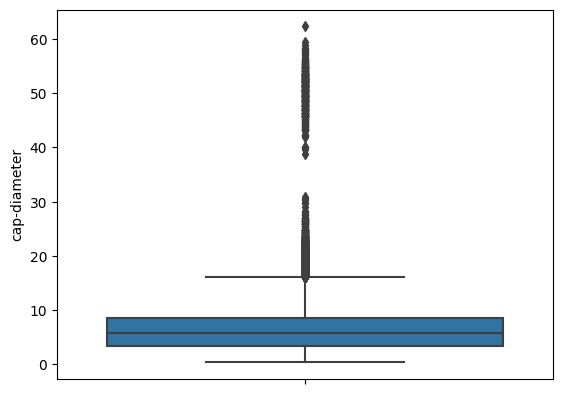

In [22]:
sns.boxplot(y=data['cap-diameter'],data=data)

<Axes: ylabel='stem-height'>

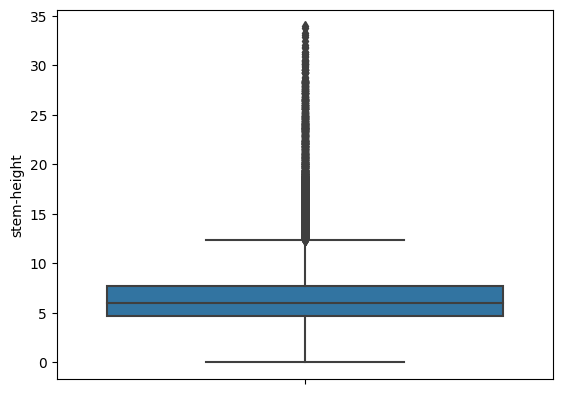

In [23]:
sns.boxplot(y=data['stem-height'],data=data)

<Axes: ylabel='stem-width'>

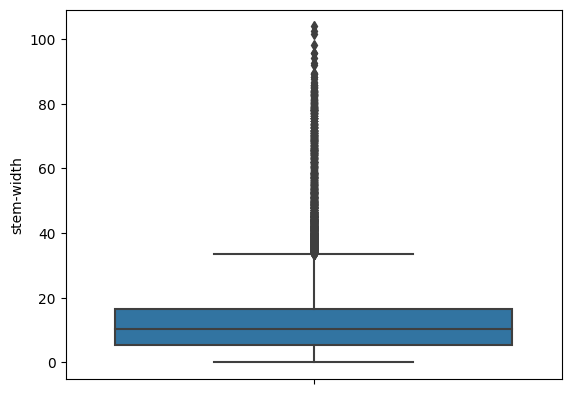

In [24]:
sns.boxplot(y=data['stem-width'],data=data)

<Axes: xlabel='cap-shape', ylabel='count'>

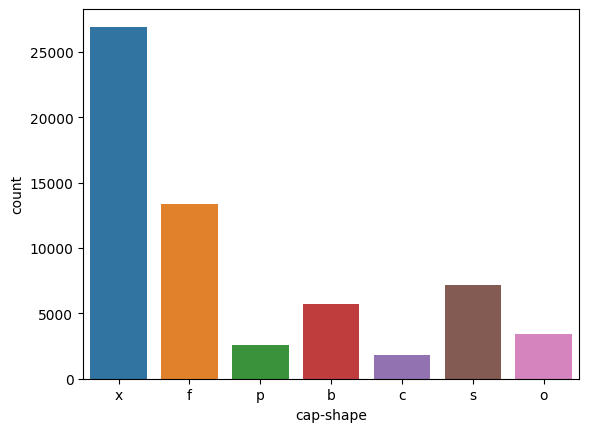

In [25]:
# cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
sns.countplot(x=data['cap-shape'],data=data)

<Axes: xlabel='cap-surface', ylabel='count'>

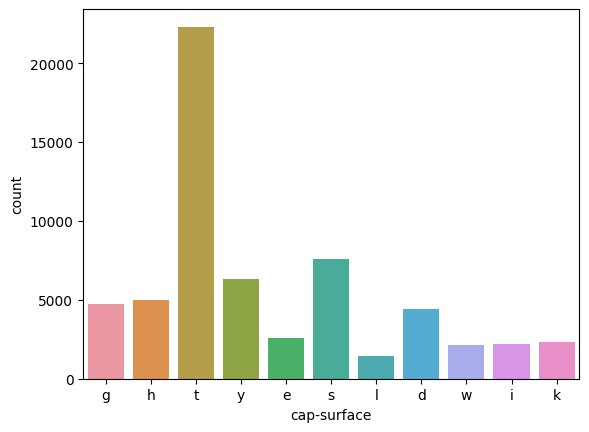

In [26]:
# cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
sns.countplot(x=data['cap-surface'],data=data)

<Axes: xlabel='cap-color', ylabel='count'>

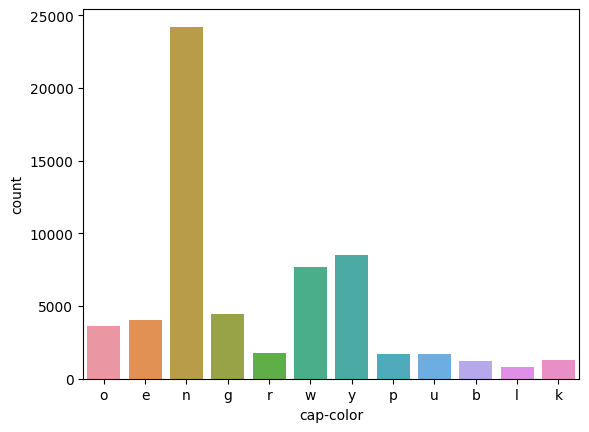

In [27]:
# cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
sns.countplot(x=data['cap-color'],data=data)

<Axes: xlabel='does-bruise-or-bleed', ylabel='count'>

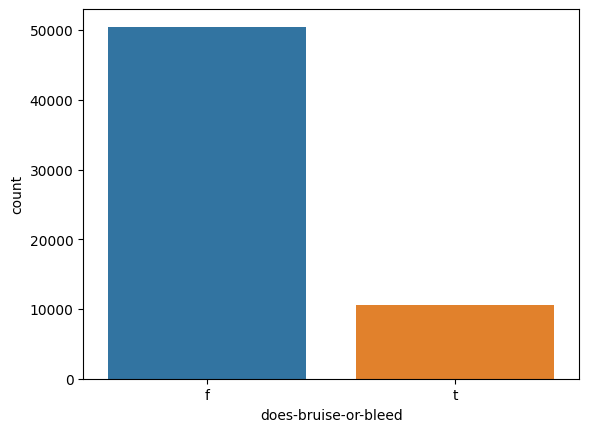

In [28]:
# bruises-or-bleeding=t,no=f
sns.countplot(x=data['does-bruise-or-bleed'],data=data)

<Axes: xlabel='gill-attachment', ylabel='count'>

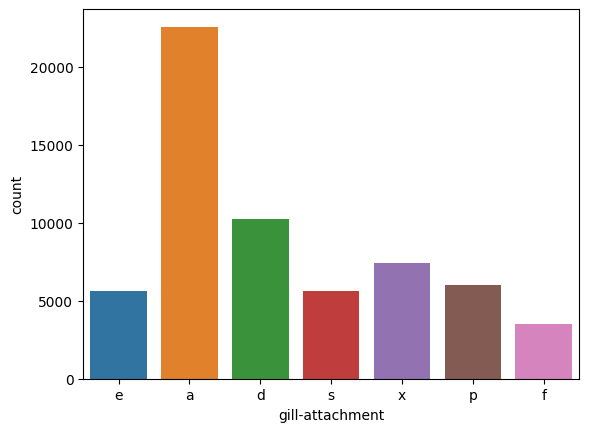

In [29]:
# adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
sns.countplot(x=data['gill-attachment'],data=data)

<Axes: xlabel='gill-color', ylabel='count'>

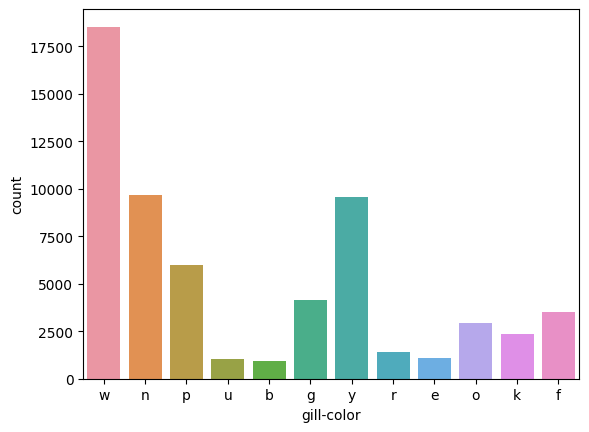

In [30]:
sns.countplot(x=data['gill-color'],data=data)

<Axes: xlabel='has-ring', ylabel='count'>

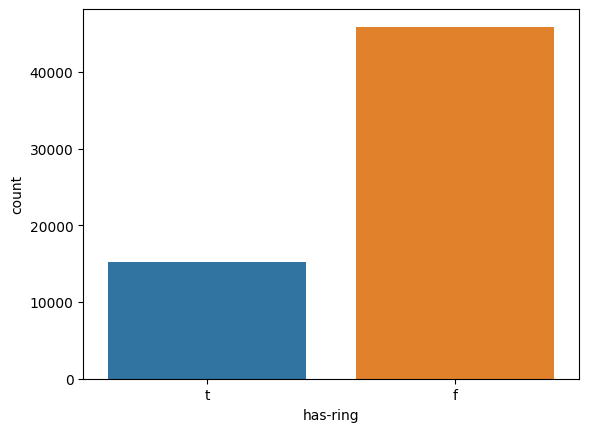

In [31]:
# ring=t, none=f
sns.countplot(x=data['has-ring'],data=data)

<Axes: xlabel='habitat', ylabel='count'>

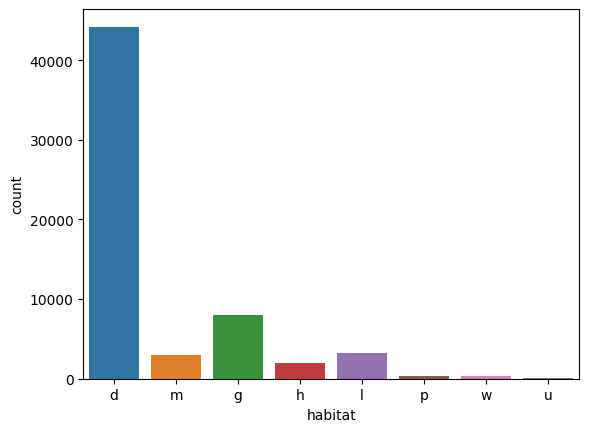

In [32]:
# grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
sns.countplot(x=data['habitat'],data=data)

<Axes: xlabel='season', ylabel='count'>

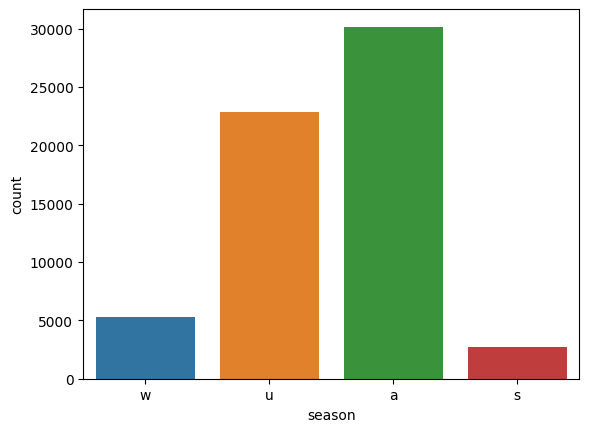

In [33]:
# spring=s, summer=u, autumn=a, winter=w
sns.countplot(x=data['season'],data=data)

In [36]:
class_mapping = {'p': 0, 'e': 1}
data['class'] = data['class'].map(class_mapping)

In [37]:
data['class'].value_counts()

0    33888
1    27181
Name: class, dtype: int64

In [39]:
data[data['class']==1]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
1059,1,10.42,f,t,n,t,a,w,11.50,17.75,w,t,g,d,a
1060,1,9.59,f,t,n,t,a,w,9.87,14.71,w,t,g,d,u
1061,1,9.10,f,t,n,t,a,w,11.45,20.24,w,t,g,d,a
1062,1,8.86,x,t,n,t,a,w,11.25,14.37,w,t,g,d,u
1063,1,9.59,x,t,n,t,a,w,7.82,15.06,w,t,g,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60711,1,4.67,o,t,n,f,f,f,4.69,19.96,n,f,f,d,s
60712,1,7.28,c,t,n,f,f,f,5.29,18.54,n,f,f,l,s
60713,1,6.60,p,t,n,f,f,f,5.52,18.88,n,f,f,l,s
60714,1,4.19,c,t,n,f,f,f,4.22,19.02,n,f,f,d,s


In [41]:
from sklearn.preprocessing import LabelEncoder
data['does-bruise-or-bleed'] = LabelEncoder().fit_transform(data['does-bruise-or-bleed'])
data['has-ring'] = LabelEncoder().fit_transform(data['has-ring'])

In [45]:
data = pd.get_dummies(data, columns=['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-color', 'stem-color', 'ring-type', 'habitat', 'season'], drop_first=True)


In [48]:
data['class'].value_counts()

0    33888
1    27181
Name: class, dtype: int64

In [49]:
x=data.drop(['class'],axis=1)
y=data['class']

In [50]:
y.unique()

array([0, 1])

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=105)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(48855, 78) (48855,) (12214, 78) (12214,)


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(max_depth=20,min_samples_split=100,min_samples_leaf=2,random_state=105,criterion='entropy').fit(x_train,y_train)
predict=DT.predict(x_test)
accuracy=accuracy_score(y_test,predict)
print(accuracy)

0.9856721794661863


In [63]:
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6779
           1       0.99      0.98      0.98      5435

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



In [65]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(DT, x_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.98567335 0.98362669 0.98301269 0.98956201 0.98710602 0.98157625
 0.98362334 0.98567042 0.98321392 0.97952917]
Mean CV score: 0.984259386268959
Standard deviation of CV scores: 0.0027062471807339093


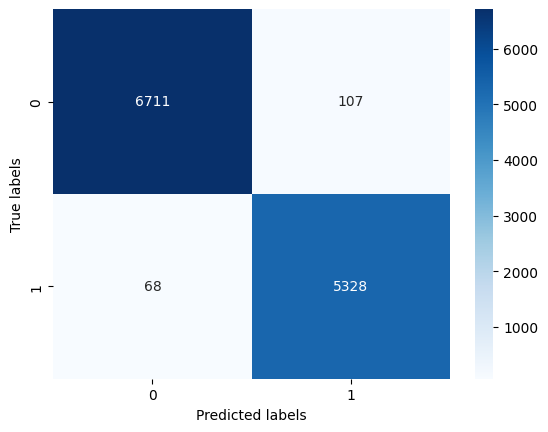

In [67]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
con=confusion_matrix(predict,y_test)

# Plotting Confusion Matrix
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

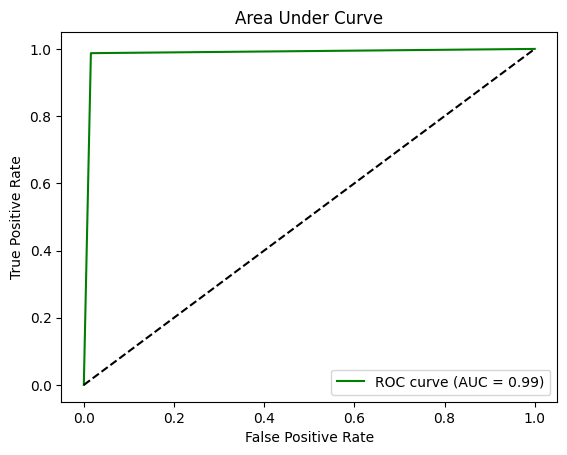

In [69]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Calculate the area under the ROC curve (AUC)
auc= roc_auc_score(predict,y_test)

# Calculate the false positive rate (FPR), true positive rate (TPR)
fpr,tpr,_=roc_curve(predict,y_test)

# Plot the ROC curve
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

stem-width: 0.1451238793223845
stem-height: 0.1044931737661446
cap-shape_x: 0.05703940061148032
does-bruise-or-bleed: 0.04541803651513741
gill-color_y: 0.040641273739278685
gill-attachment_d: 0.03777015753857455
stem-color_w: 0.03647355523119651
cap-diameter: 0.035282855262754945
cap-surface_s: 0.03315365963611199
cap-surface_g: 0.03266207366914345
ring-type_z: 0.028954552053823725
gill-color_w: 0.027336863550248995
gill-attachment_x: 0.02607217035778591
has-ring: 0.02081580583498811
cap-color_r: 0.0195373455691658
gill-attachment_s: 0.017382548081565637
cap-surface_i: 0.016795022888589372
gill-attachment_p: 0.015949517494491826
gill-color_n: 0.014818023405505905
ring-type_l: 0.014374493142917728
gill-color_f: 0.014084927548433886
cap-surface_k: 0.013340211533319643
stem-color_p: 0.013018915295292175
gill-color_p: 0.012918867768192477
cap-surface_h: 0.012238330823625847
cap-color_e: 0.011669138541021092
cap-surface_y: 0.01111687898289722
stem-color_y: 0.010976338813327475
cap-shape_o: 

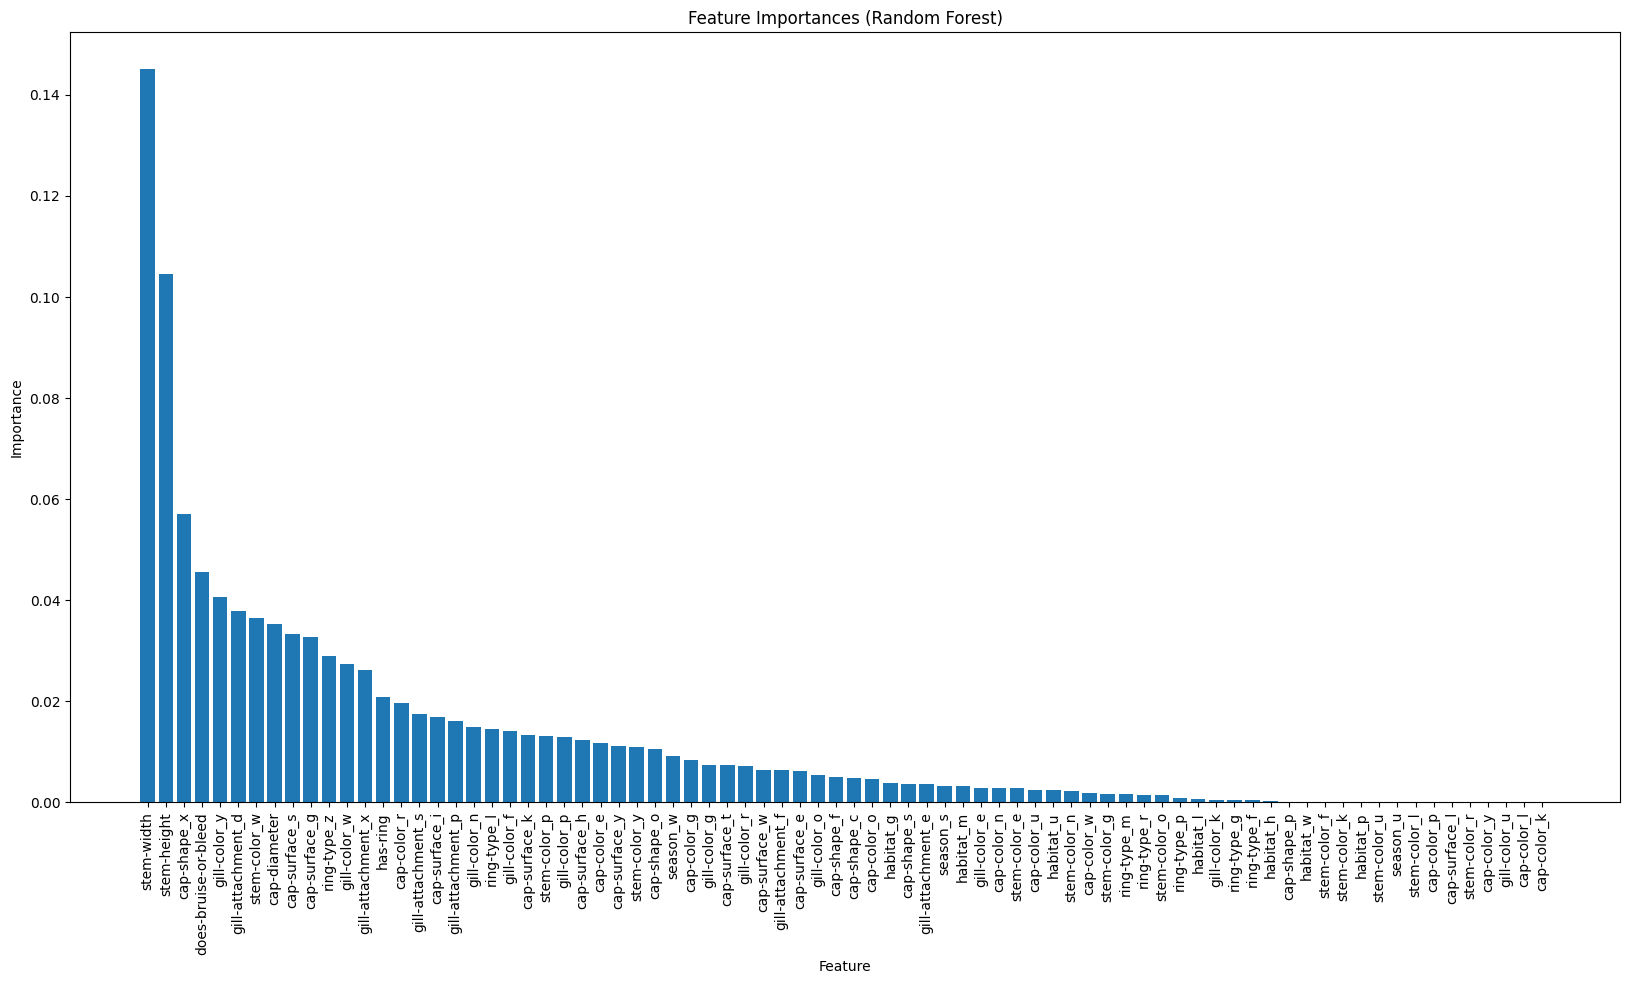

In [82]:
feature_importances = DT.feature_importances_

# Get the names of the features (if you have them)
feature_names = x_train.columns  # Replace with your actual feature names

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature importances
for i in range(len(sorted_idx)):
    print(f"{feature_names[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]}")

# Create a bar chart to visualize feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], tick_label=[feature_names[i] for i in sorted_idx])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.xticks(rotation=90)
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=200,min_samples_split=100,min_samples_leaf=2,max_depth=20,criterion='entropy',bootstrap=True,max_features='sqrt').fit(x_train,y_train)
predict_RF=RF.predict(x_test)
accuracy_RF=accuracy_score(predict_RF,y_test)
print(accuracy_RF)

0.9958244637301458


In [74]:
report_RF = classification_report(y_test, predict_RF)
print(report_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6779
           1       1.00      0.99      1.00      5435

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [77]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(RF, x_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.99611134 0.99549734 0.99529267 0.99652067 0.99488334 0.99692938
 0.99447288 0.99713408 0.99611054 0.99570113]
Mean CV score: 0.9958653366353681
Standard deviation of CV scores: 0.0008176551370546527


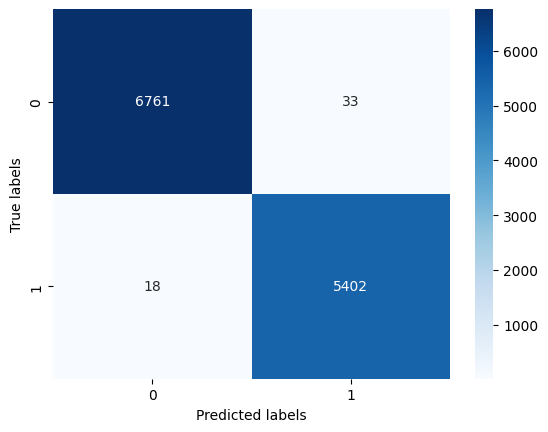

In [75]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
con=confusion_matrix(predict_RF,y_test)

# Plotting Confusion Matrix
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

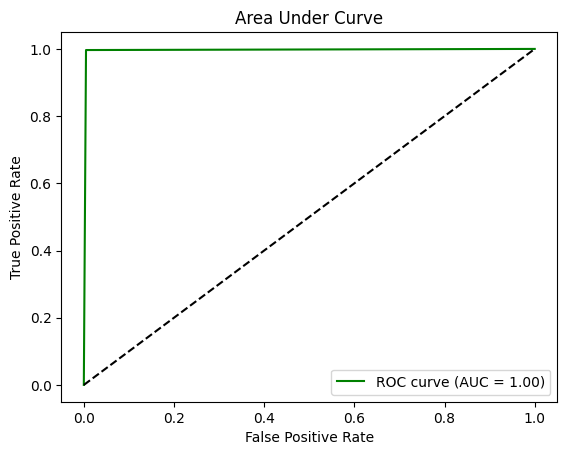

In [76]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Calculate the area under the ROC curve (AUC)
auc= roc_auc_score(predict_RF,y_test)

# Calculate the false positive rate (FPR), true positive rate (TPR)
fpr,tpr,_=roc_curve(predict_RF,y_test)

# Plot the ROC curve
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

stem-width: 0.10265584289717372
stem-height: 0.07592955453687254
cap-diameter: 0.06620898646159437
stem-color_w: 0.041417291092023446
gill-attachment_p: 0.029345056097534582
does-bruise-or-bleed: 0.029282967279327287
ring-type_z: 0.02493247327794647
gill-color_w: 0.024191076707479806
has-ring: 0.021728914434302787
gill-attachment_d: 0.02041563737152849
cap-surface_t: 0.019584891888147868
cap-shape_x: 0.019313942028264218
gill-color_y: 0.018320229177766524
cap-surface_g: 0.01791129499775435
cap-surface_s: 0.017634177413796
gill-attachment_x: 0.01688300831171071
gill-attachment_e: 0.016424055705834887
cap-surface_k: 0.015626644793107554
stem-color_n: 0.015314603260253945
stem-color_y: 0.014708812843508667
gill-color_n: 0.014202633389933
gill-color_p: 0.01412511687273352
ring-type_f: 0.013889151671538176
cap-surface_y: 0.013830065338511707
habitat_g: 0.013112050103630502
gill-attachment_s: 0.01273777611014751
cap-color_n: 0.01252132126953178
cap-color_r: 0.01236694392084106
cap-surface_e:

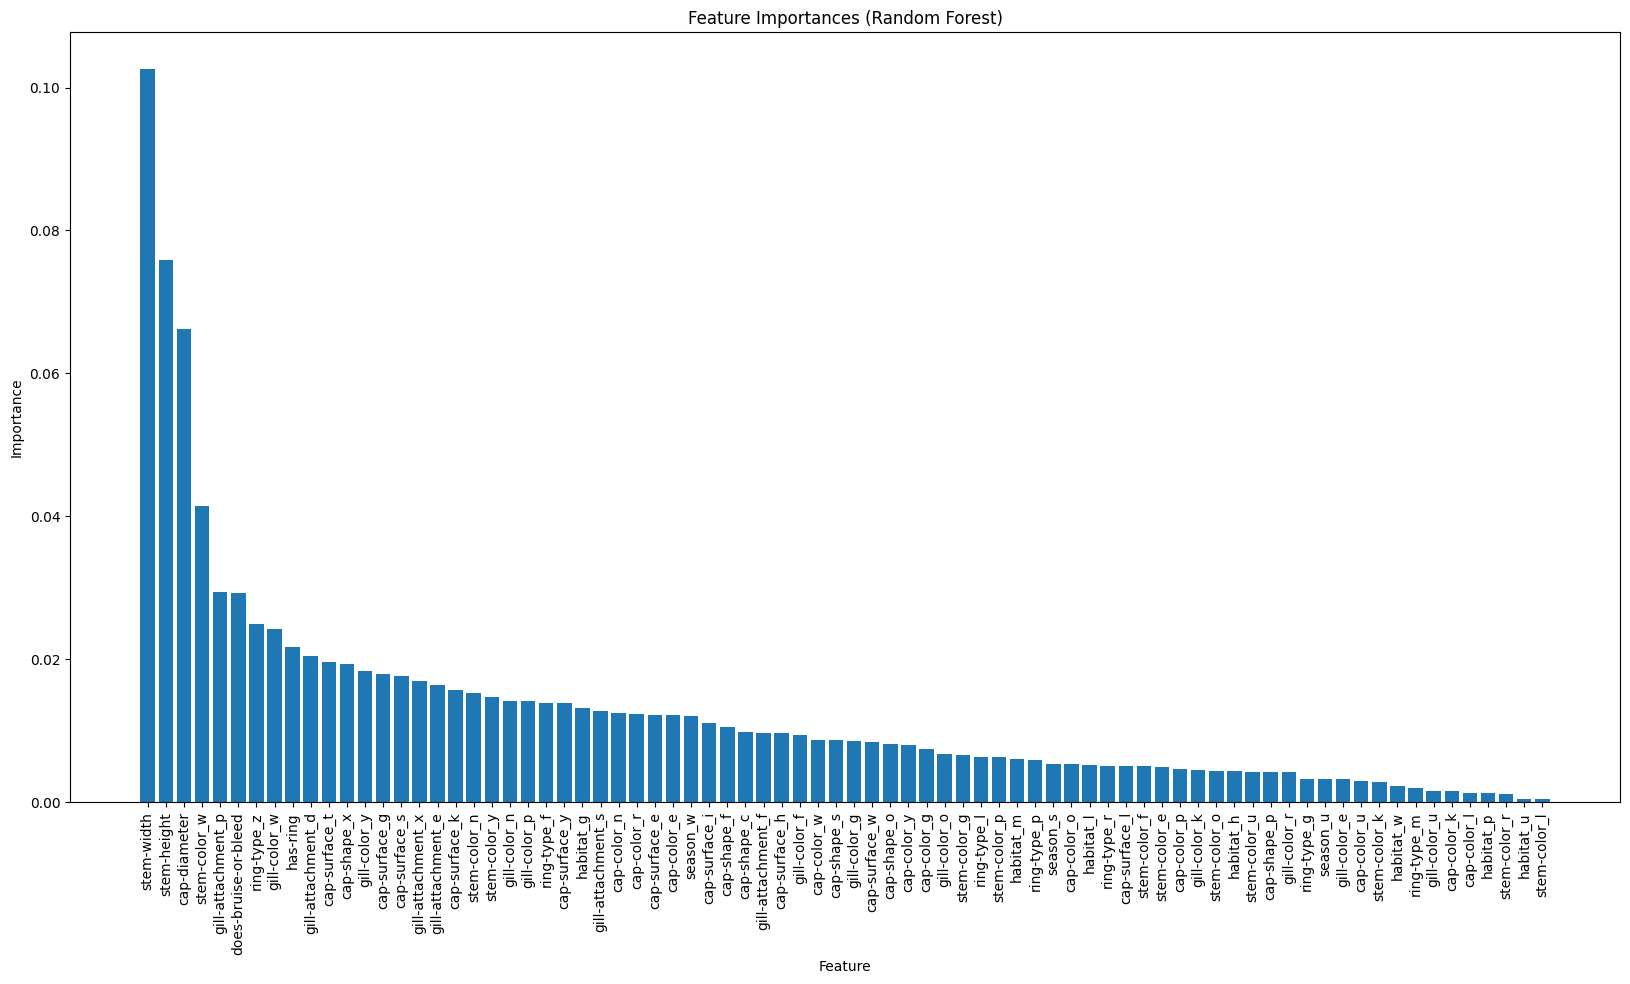

In [81]:
feature_importances = RF.feature_importances_

# Get the names of the features (if you have them)
feature_names = x_train.columns  # Replace with your actual feature names

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature importances
for i in range(len(sorted_idx)):
    print(f"{feature_names[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]}")

# Create a bar chart to visualize feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], tick_label=[feature_names[i] for i in sorted_idx])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.xticks(rotation=90)
plt.show()